Performance Metrics:

Linear Regression:
Train MSE: 1529.020470551296
Test MSE: 2370.0963747758187
Train MAE: 23.232255784639353
Test MAE: 31.406218675535484
Train R^2: 0.9204648044109383
Test R^2: 0.9534424890368547

Random Forest:
Train MSE: 698.6687008303048
Test MSE: 5080.112298231925
Train MAE: 11.549807616818624
Test MAE: 30.239843558771607
Train R^2: 0.9636572872353643
Test R^2: 0.9002076934355406

Cross-validation MSE:
Linear Regression: 3377.766853291595
Random Forest: 4527.2313380403275

Random Forest Cross-validation Metrics:
Average MSE: 4527.2313380403275
Average MAE: 34.79210065186378
Average R^2: 0.7991838743129434


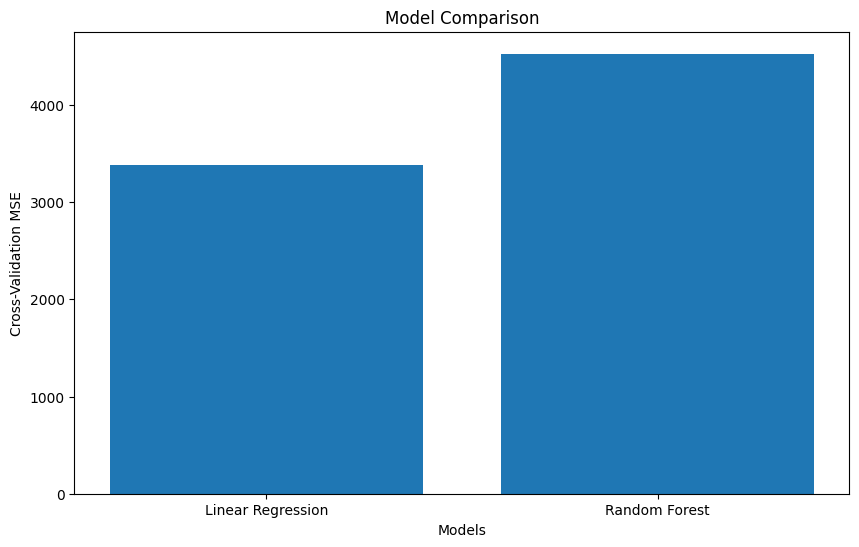

C:\Users\Yeon Je Chan\AppData\Local\Temp\ipykernel_15912\3907007281.py:138: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  plt.tight_layout()
C:\Users\Yeon Je Chan\AppData\Local\Temp\ipykernel_15912\3907007281.py:138: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  plt.tight_layout()
C:\Users\Yeon Je Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yeon Je Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


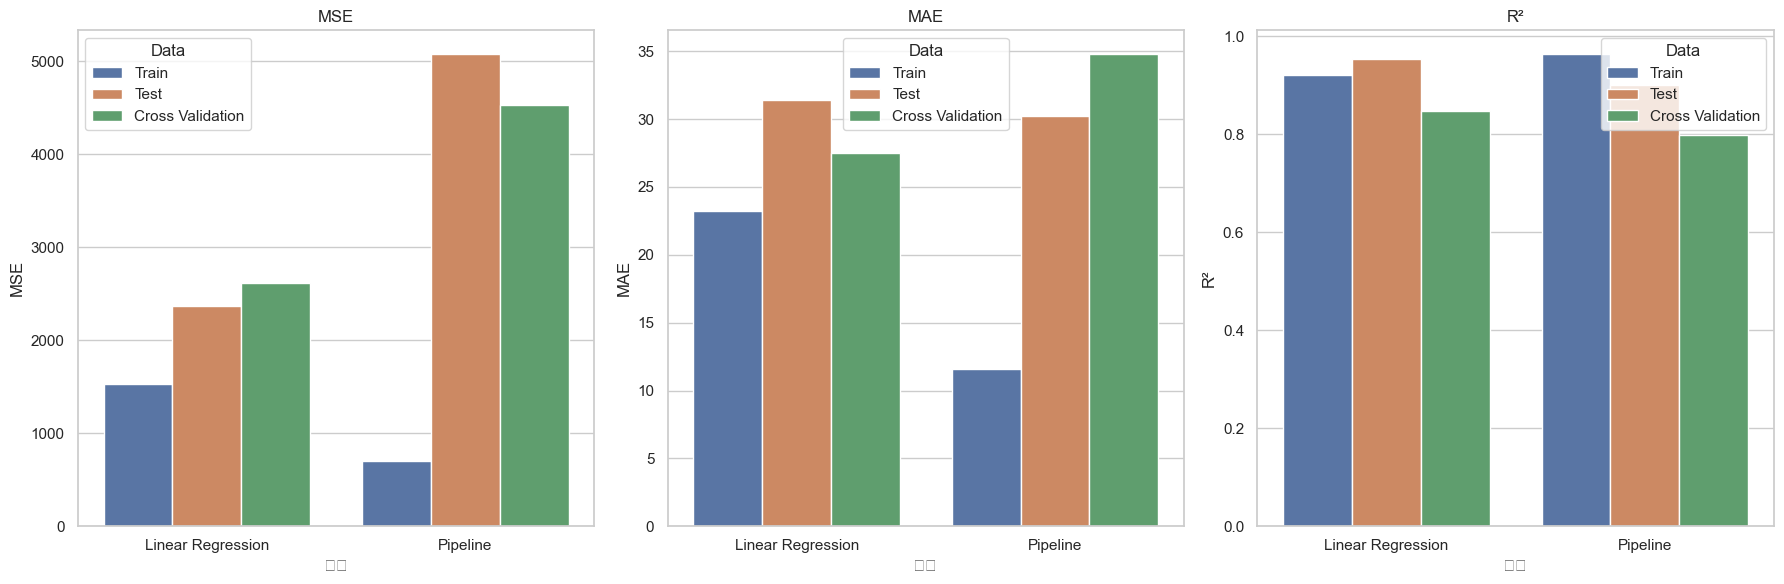

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv("machine.data_update.csv")

X = data.drop(columns=['PRP','VendorName','ModelName'])
y = data["PRP"]

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

param_grids = {
    'Linear Regression': {},
    'Random Forest': {'model__n_estimators': [100, 200, 300],
                      'model__max_depth': [None, 5, 10, 20]}
}

best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

metrics = {}
for name, model in best_estimators.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    metrics[name] = {
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train R^2': r2_score(y_train, y_train_pred),
        'Test R^2': r2_score(y_test, y_test_pred)
    }


cv_scores = {}
for name, model in best_estimators.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores[name] = -scores.mean()


rf_model = best_estimators['Random Forest']
rf_cv_scores_mse = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores_mae = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
rf_cv_scores_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

rf_mse_mean = -rf_cv_scores_mse.mean()
rf_mae_mean = -rf_cv_scores_mae.mean()
rf_r2_mean = rf_cv_scores_r2.mean()

print("Performance Metrics:")
for name, metric in metrics.items():
    print(f"\n{name}:")
    for key, value in metric.items():
        print(f"{key}: {value}")

print("\nCross-validation MSE:")
for name, score in cv_scores.items():
    print(f"{name}: {score}")

print("\nRandom Forest Cross-validation Metrics:")
print(f"Average MSE: {rf_mse_mean}")
print(f"Average MAE: {rf_mae_mean}")
print(f"Average R^2: {rf_r2_mean}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(cv_scores)), list(cv_scores.values()), align='center')
plt.xticks(range(len(cv_scores)), list(cv_scores.keys()))
plt.xlabel('Models')
plt.ylabel('Cross-Validation MSE')
plt.title('Model Comparison')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({
    "Model": ["Linear Regression", "Linear Regression", "Pipeline", "Pipeline", "Linear Regression", "Pipeline"],
    "Data": ["Train", "Test", "Train", "Test", "Cross Validation", "Cross Validation"],
    "MSE": [1529.020470551296, 2370.0963747758187, 698.6687008303048, 5080.112298231925, 2611.435766839486, 4527.2313380403275],
    "MAE": [23.232255784639353, 31.406218675535484, 11.549807616818624, 30.239843558771607, 27.519659384521837, 34.79210065186378],
    "R²": [0.9204648044109383, 0.9534424890368547, 0.9636572872353643, 0.9002076934355406, 0.8479914615575094, 0.7991838743129434]
})

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x="Model", y="MSE", hue="Data", data=data, ax=axes[0])
axes[0].set_title('MSE')
axes[0].set_xlabel('모델')
axes[0].set_ylabel('MSE')

sns.barplot(x="Model", y="MAE", hue="Data", data=data, ax=axes[1])
axes[1].set_title('MAE')
axes[1].set_xlabel('모델')
axes[1].set_ylabel('MAE')

sns.barplot(x="Model", y="R²", hue="Data", data=data, ax=axes[2])
axes[2].set_title('R²')
axes[2].set_xlabel('모델')
axes[2].set_ylabel('R²')

plt.tight_layout()
plt.show()